In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv("../data/student_performance_large_dataset.csv")

In [51]:
df.head()

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Student_ID                               10000 non-null  object
 1   Age                                      10000 non-null  int64 
 2   Gender                                   10000 non-null  object
 3   Study_Hours_per_Week                     10000 non-null  int64 
 4   Preferred_Learning_Style                 10000 non-null  object
 5   Online_Courses_Completed                 10000 non-null  int64 
 6   Participation_in_Discussions             10000 non-null  object
 7   Assignment_Completion_Rate (%)           10000 non-null  int64 
 8   Exam_Score (%)                           10000 non-null  int64 
 9   Attendance_Rate (%)                      10000 non-null  int64 
 10  Use_of_Educational_Tech                  10000 non-null  ob

In [53]:
df.isnull().sum()

Student_ID                                 0
Age                                        0
Gender                                     0
Study_Hours_per_Week                       0
Preferred_Learning_Style                   0
Online_Courses_Completed                   0
Participation_in_Discussions               0
Assignment_Completion_Rate (%)             0
Exam_Score (%)                             0
Attendance_Rate (%)                        0
Use_of_Educational_Tech                    0
Self_Reported_Stress_Level                 0
Time_Spent_on_Social_Media (hours/week)    0
Sleep_Hours_per_Night                      0
Final_Grade                                0
dtype: int64

In [54]:
df.duplicated().sum()

np.int64(0)

In [55]:
dict_final_grade = {'A': 0,'B': 1, 'C': 2, 'D':3}

df['Final_Grade_num'] = df['Final_Grade'].map(dict_final_grade)

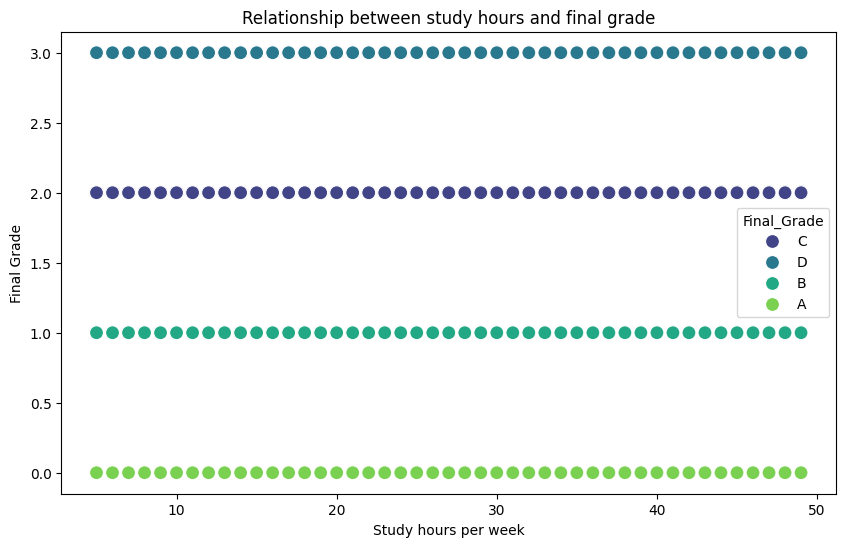

In [56]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = df, x= 'Study_Hours_per_Week', y='Final_Grade_num',hue="Final_Grade",palette="viridis", s=100)
plt.xlabel('Study hours per week')
plt.ylabel('Final Grade')
plt.title('Relationship between study hours and final grade')
plt.show()

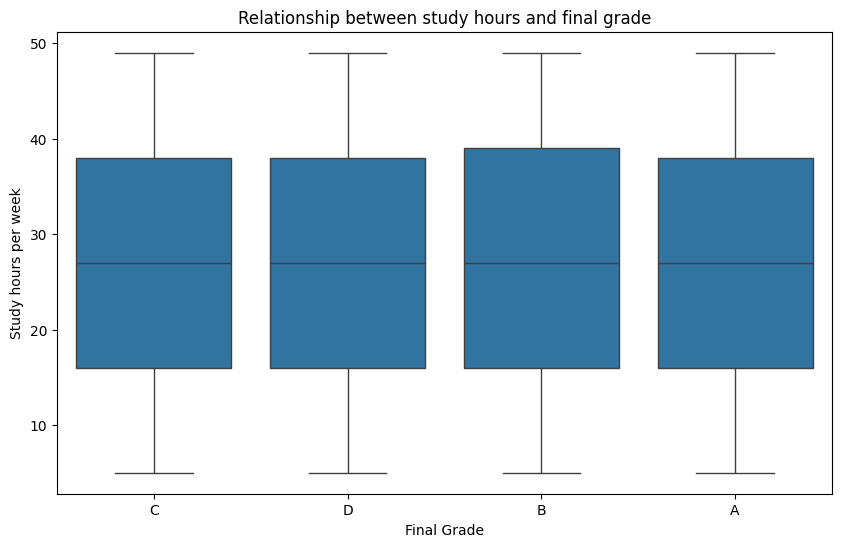

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Final_Grade", y="Study_Hours_per_Week")
plt.xlabel("Final Grade")
plt.ylabel("Study hours per week")
plt.title("Relationship between study hours and final grade")
plt.show()

In [58]:
df.groupby('Study_Hours_per_Week')['Final_Grade_num'].agg(['mean', 'median']).sort_values(['mean', 'median'], ascending=False).head(10)

,mean,median
Study_Hours_per_Week,,
16,1.599119,2.0
13,1.558233,2.0
20,1.556098,2.0
33,1.533898,2.0
48,1.521127,1.0
46,1.518018,2.0
37,1.510460,2.0
25,1.508850,1.0
7,1.502439,1.0


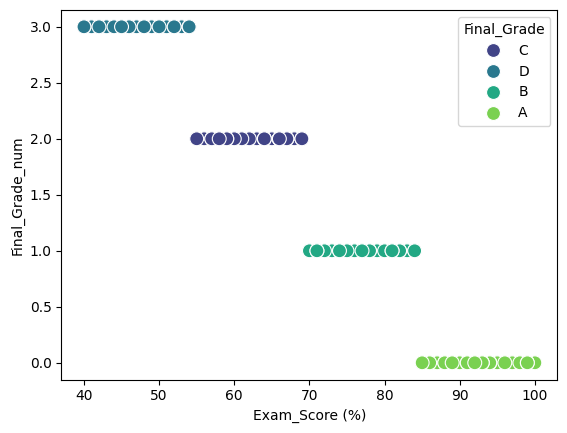

In [59]:
_=sns.scatterplot(data=df, x = 'Exam_Score (%)', y = 'Final_Grade_num', hue="Final_Grade",palette="viridis", s=100)

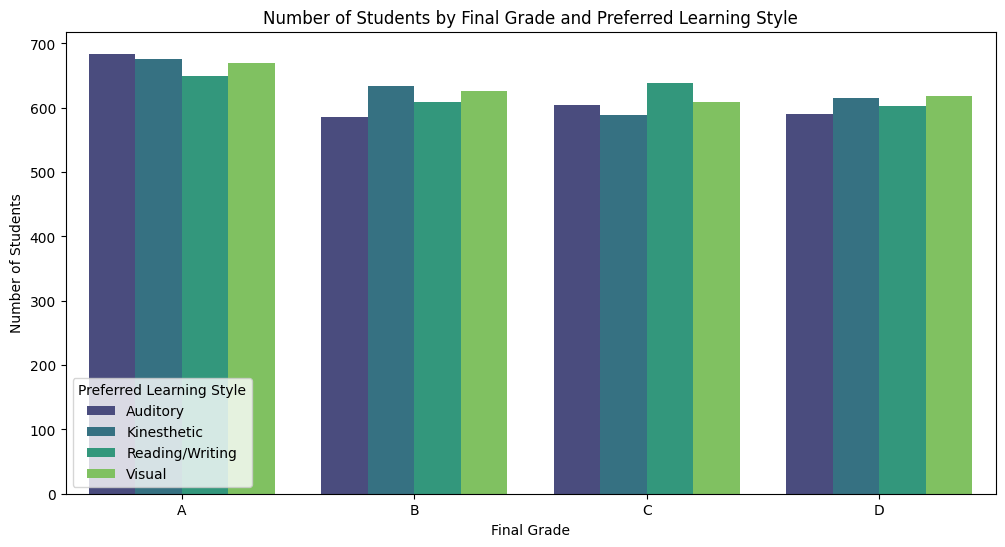

In [60]:
plt.figure(figsize=(12, 6))
df_count = df.groupby(['Final_Grade_num', 'Preferred_Learning_Style']).size().reset_index(name='count')
final_grade_inv = {v:k for k,v in dict_final_grade.items()}
df_count['Final_Grade'] = df_count['Final_Grade_num']. map(final_grade_inv)
sns.barplot(data=df_count, x="Final_Grade", y="count", hue="Preferred_Learning_Style", palette="viridis")


plt.xlabel("Final Grade")
plt.ylabel("Number of Students")
plt.title("Number of Students by Final Grade and Preferred Learning Style")
plt.legend(title="Preferred Learning Style", loc='lower left')
plt.show()

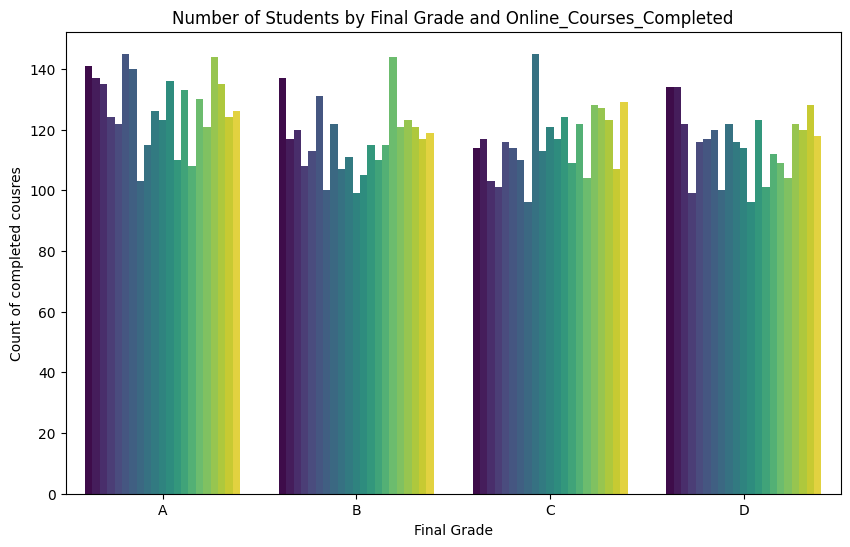

In [13]:
df_count = df.groupby(['Final_Grade_num', 'Online_Courses_Completed']).size().reset_index(name='count')
df_count['Final_Grade'] = df_count['Final_Grade_num']. map(final_grade_inv)
plt.figure(figsize = (10,6) )
sns.barplot(data=df_count, x="Final_Grade", y="count", hue="Online_Courses_Completed", palette="viridis")

sm = plt.cm.ScalarMappable(cmap="viridis")
sm.set_array([])

# Dodanie colorbar
# cbar = plt.colorbar(sm, label="Online Courses Completed")
# cbar.set_ticks(range(int(df_count['Online_Courses_Completed'].min()), int(df_count['Online_Courses_Completed'].max()) + 1))

plt.xlabel("Final Grade")
plt.ylabel("Count of completed cousres")
plt.title("Number of Students by Final Grade and Online_Courses_Completed")
plt.legend([], [], frameon=False)
plt.show()

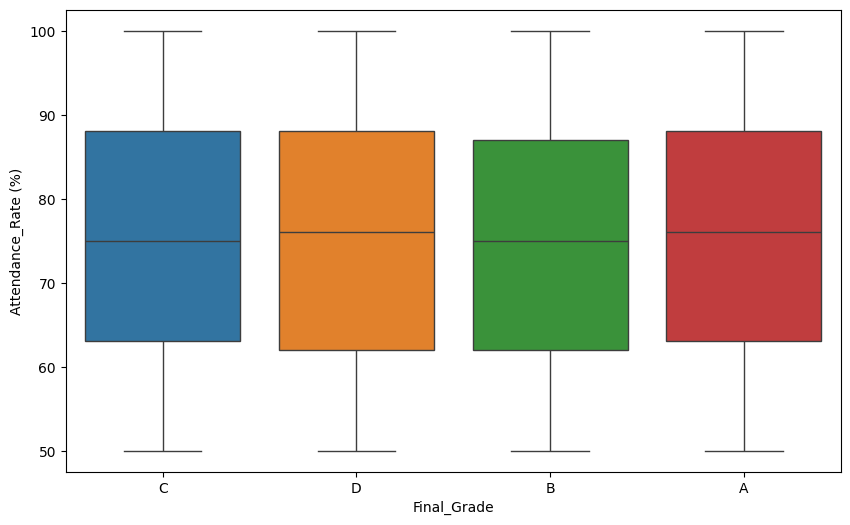

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x = 'Final_Grade', y = 'Attendance_Rate (%)',hue='Final_Grade')
plt.show()

<Axes: xlabel='Final_Grade', ylabel='count'>

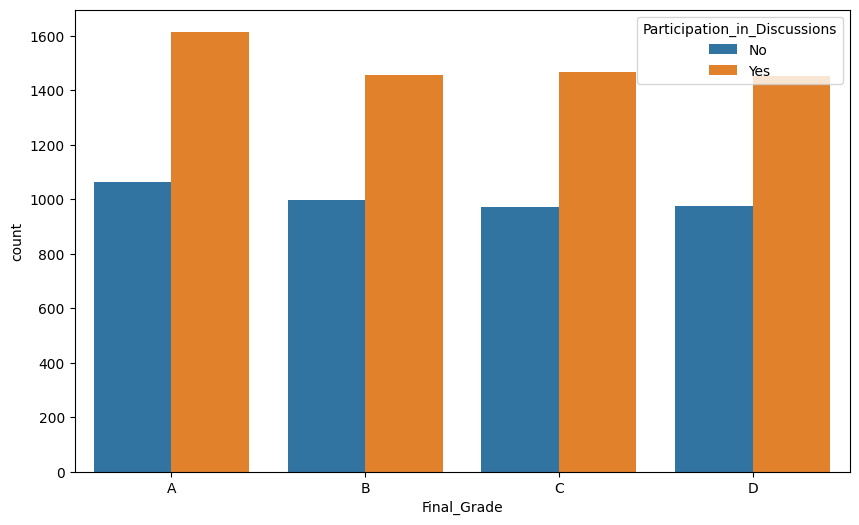

In [15]:
df_count = df.groupby(['Participation_in_Discussions', 'Final_Grade_num']).size().reset_index(name='count')
df_count['Final_Grade'] = df_count['Final_Grade_num']. map(final_grade_inv)
plt.figure(figsize = (10,6))
sns.barplot(data=df_count, x = 'Final_Grade', y='count', hue = 'Participation_in_Discussions')

In [16]:
df.groupby(['Sleep_Hours_per_Night', 'Final_Grade_num']).size().reset_index(name='count').head()

,Sleep_Hours_per_Night,Final_Grade_num,count
0,4,0,411
1,4,1,353
2,4,2,327
3,4,3,353
4,5,0,382


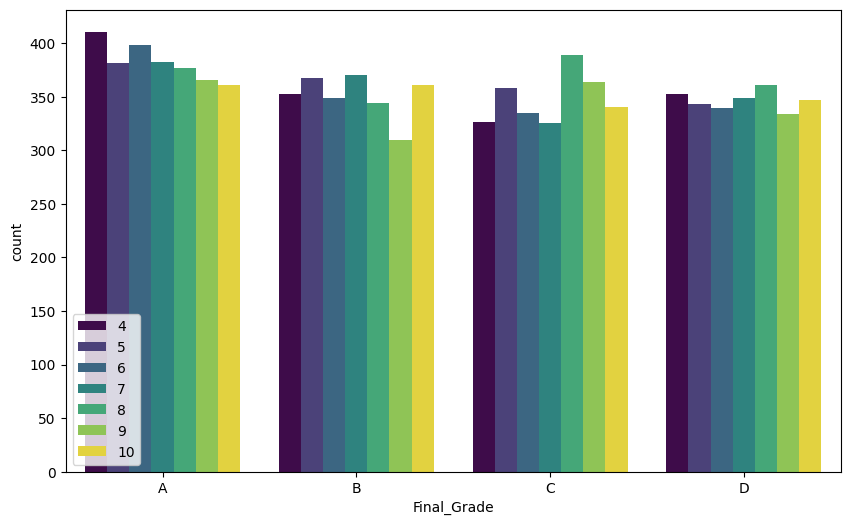

In [17]:
df_count = df.groupby(['Sleep_Hours_per_Night', 'Final_Grade_num']).size().reset_index(name='count')
df_count['Final_Grade'] = df_count['Final_Grade_num']. map(final_grade_inv)
plt.figure(figsize = (10,6))
sns.barplot(data=df_count, x = 'Final_Grade', y='count', hue = 'Sleep_Hours_per_Night', palette="viridis")
plt.legend(loc='lower left')

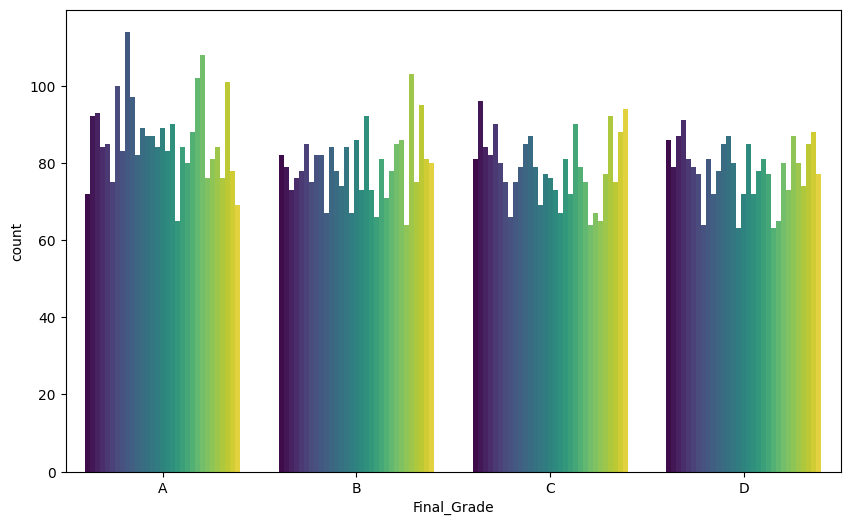

In [18]:
df_count = df.groupby(['Time_Spent_on_Social_Media (hours/week)', 'Final_Grade_num']).size().reset_index(name='count')
df_count['Final_Grade'] = df_count['Final_Grade_num']. map(final_grade_inv)
plt.figure(figsize = (10,6))
sns.barplot(data=df_count, x = 'Final_Grade', y='count', hue = 'Time_Spent_on_Social_Media (hours/week)',palette="viridis")


plt.legend([], [], frameon=False)

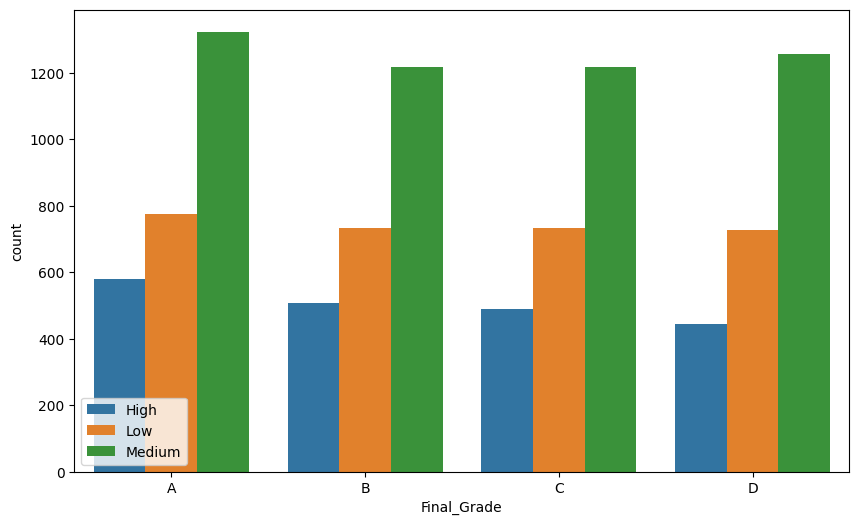

In [19]:
df_count = df.groupby(['Self_Reported_Stress_Level', 'Final_Grade_num']).size().reset_index(name='count')
df_count['Final_Grade'] = df_count['Final_Grade_num']. map(final_grade_inv)
plt.figure(figsize = (10,6))
sns.barplot(data=df_count, x = 'Final_Grade', y='count', hue = 'Self_Reported_Stress_Level')
plt.legend(loc='lower left')

In [21]:
label_enc = LabelEncoder()
for col in df.select_dtypes(np.object_).columns:
    df[col] = label_enc.fit_transform(df[col])

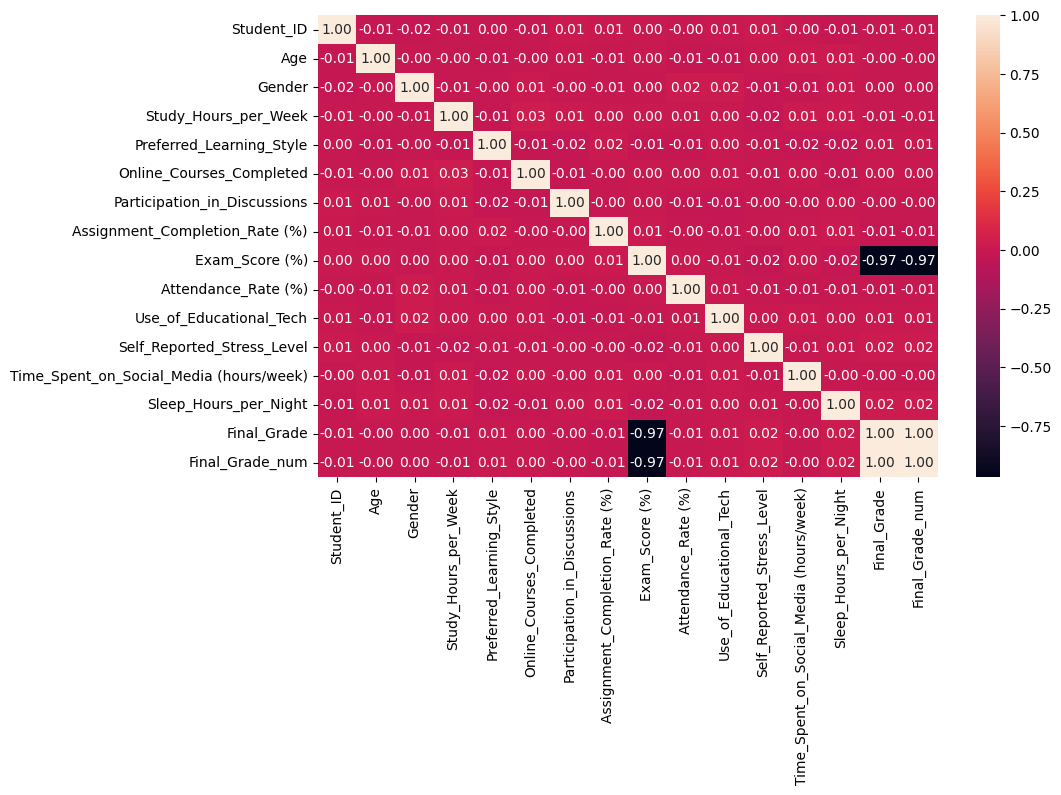

In [22]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(method='spearman'), annot = True, fmt='.2f')
plt.show()

In [24]:
X = df.drop(columns=['Final_Grade', 'Final_Grade_num'])  # Drop original and target
y = df['Final_Grade_num']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y ,  random_state=42)


In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer , make_column_selector  as selector

from sklearn.pipeline import make_pipeline


cat_pipeline= make_pipeline(
    OneHotEncoder(drop='if_binary', sparse_output=False)  #      اسقاط احد العمودين في حالة المتغير الثنائي
)

preprocess= make_column_transformer(
     (cat_pipeline, selector(dtype_include="object")) , #category  كان بالامكان تغيير  نوع المتغيرات الى تصنيف
     remainder="passthrough"  # واسقاط باقي البيانات الغير رقمية
     )

In [26]:
# التحقق من تحويل  البيانات
preprocess.fit_transform(X_train)[1]

array([2737,   25,    2,   21,    1,   12,    1,   73,   72,   92,    1,
          1,   22,   10])

In [27]:
# حجم  البيانات
preprocess.fit_transform(X_train).shape

(8000, 14)

In [28]:
#  هيكل نموذج خوارزمية التنبؤ
from xgboost  import XGBClassifier
from sklearn.decomposition import PCA
pipe_XGBCl= make_pipeline(
    preprocess,    # تغيير سلم البيانات الرقمية
    PCA( ),  #    يعوض لاحقا ضمن المعايير أدناه

    XGBClassifier()
)

In [29]:
from sklearn import set_config
set_config(display='diagram', )

In [30]:
# تدريب البيانات
pipe_XGBCl.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x71ebf0436ab0>)])),
                ('pca', PCA()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=Non...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [31]:
#pipeline  معايير
list(pipe_XGBCl.get_params().keys())

['memory',
 'steps',
 'transform_input',
 'verbose',
 'columntransformer',
 'pca',
 'xgbclassifier',
 'columntransformer__force_int_remainder_cols',
 'columntransformer__n_jobs',
 'columntransformer__remainder',
 'columntransformer__sparse_threshold',
 'columntransformer__transformer_weights',
 'columntransformer__transformers',
 'columntransformer__verbose',
 'columntransformer__verbose_feature_names_out',
 'columntransformer__pipeline',
 'columntransformer__pipeline__memory',
 'columntransformer__pipeline__steps',
 'columntransformer__pipeline__transform_input',
 'columntransformer__pipeline__verbose',
 'columntransformer__pipeline__onehotencoder',
 'columntransformer__pipeline__onehotencoder__categories',
 'columntransformer__pipeline__onehotencoder__drop',
 'columntransformer__pipeline__onehotencoder__dtype',
 'columntransformer__pipeline__onehotencoder__feature_name_combiner',
 'columntransformer__pipeline__onehotencoder__handle_unknown',
 'columntransformer__pipeline__onehotencod

In [47]:
param_grid = {
    'xgbclassifier__n_estimators': [50, 100, 150, 200],
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'xgbclassifier__max_depth': range(3, 5),
    'xgbclassifier__colsample_bytree': [i/10.0 for i in range(1, 3)],
    'xgbclassifier__gamma': [i/10.0 for i in range(3)],
    'pca__n_components': [5, 10, 14]  # Updated for 14 features max
}

In [48]:
# Define cross validation
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=42, shuffle=True)

In [44]:
# Precision, Recall, and F1-Score (Per Class)

from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer, accuracy_score
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision_Macro': make_scorer(precision_score, average='macro'),
    'Recall_Macro': make_scorer(recall_score, average='macro'),
    'F1_Macro': make_scorer(f1_score, average='macro')
}

In [45]:
from sklearn.model_selection import RandomizedSearchCV

gridSearch = RandomizedSearchCV(pipe_XGBCl, param_distributions=param_grid, cv=kf, verbose=3, n_jobs=-1 ,scoring= scoring  , n_iter=100, refit= "Recall_Macro", error_score="raise" )

In [46]:
# التدريب
gridSearch.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END pca__n_components=10, xgbclassifier__colsample_bytree=0.1, xgbclassifier__gamma=0.2, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=150; Accuracy: (test=0.980) F1_Macro: (test=0.980) Precision_Macro: (test=0.980) Recall_Macro: (test=0.980) total time=   0.5s
[CV 2/5] END pca__n_components=10, xgbclassifier__colsample_bytree=0.1, xgbclassifier__gamma=0.2, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=150; Accuracy: (test=0.959) F1_Macro: (test=0.959) Precision_Macro: (test=0.959) Recall_Macro: (test=0.959) total time=   0.5s
[CV 3/5] END pca__n_components=10, xgbclassifier__colsample_bytree=0.1, xgbclassifier__gamma=0.2, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=150; Accuracy: (test=0.973) F1_Macro: (test=0.973) Precision_Macro: (test=0.972) Recall_Macro: (test=0.973) total ti

[CV 2/5] END pca__n_components=10, xgbclassifier__colsample_bytree=0.1, xgbclassifier__gamma=0.1, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=200; Accuracy: (test=0.961) F1_Macro: (test=0.961) Precision_Macro: (test=0.961) Recall_Macro: (test=0.961) total time=   0.6s
[CV 3/5] END pca__n_components=10, xgbclassifier__colsample_bytree=0.1, xgbclassifier__gamma=0.1, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=200; Accuracy: (test=0.977) F1_Macro: (test=0.977) Precision_Macro: (test=0.976) Recall_Macro: (test=0.977) total time=   0.6s
[CV 4/5] END pca__n_components=10, xgbclassifier__colsample_bytree=0.1, xgbclassifier__gamma=0.1, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=200; Accuracy: (test=0.983) F1_Macro: (test=0.983) Precision_Macro: (test=0.983) Recall_Macro: (test=0.982) total time=   0.6s
[CV 5/5] END pca__n_components=10, xgbclassifier__colsa

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   error_score='raise',
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipeline',
                                                                               Pipeline(steps=[('onehotencoder',
                                                                                                OneHotEncoder(drop='if_binary',
                                                                                                              sparse_output=False))]),
                                                                               <sklearn.compose._column_transformer.make_column_selector o...
                                                                        200]},
                   refit='Recall_Macro',
                   scoring={'Accuracy': make_scorer(accuracy_score, response_method='predict'),
                            'F1_Macro': make_scorer(f1_score, response_method='predict', average=macro),
                            'Precision_Macro': make_scorer(precision_score, response_method='predict', average=macro),
                            'Recall_Macro': make_scorer(recall_score, response_method='predict', average=macro)},
                   verbose=3)

In [61]:
# افضل المعايير التي تم الاحتفاظ بها
gridSearch.best_params_

{'xgbclassifier__n_estimators': 200,
 'xgbclassifier__max_depth': 3,
 'xgbclassifier__learning_rate': 0.3,
 'xgbclassifier__gamma': 0.1,
 'xgbclassifier__colsample_bytree': 0.2,
 'pca__n_components': 10}

In [62]:
#  قائمة أفضل المعاييير
gridSearch.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x71ebe8300bf0>)])),
                ('pca', PCA(n_components=10)),
                ('xgbclassifier',
                 XGBClassifier(base_score=N...
                               feature_types=None, gamma=0.1, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.3,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [63]:
#AUC    قياس درجة  دقة  التنبؤ لمعيار
print('Bes F1_Macro Score: {}'.format(gridSearch.best_score_))

Bes F1_Macro Score: 0.9900022793986064


In [64]:
y_pred=gridSearch.predict(X_test)
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.99


In [65]:
# قياس الدقة في ضوء أفضل المعايير
gridSearch.best_estimator_.score(X_test, y_test)

0.99

In [66]:
from sklearn.metrics import confusion_matrix
cfm= pd.DataFrame(confusion_matrix(y_test, y_pred))
cfm.index.name="Actual"
cfm.columns.name="Predicted"

<Axes: xlabel='Predicted', ylabel='Actual'>

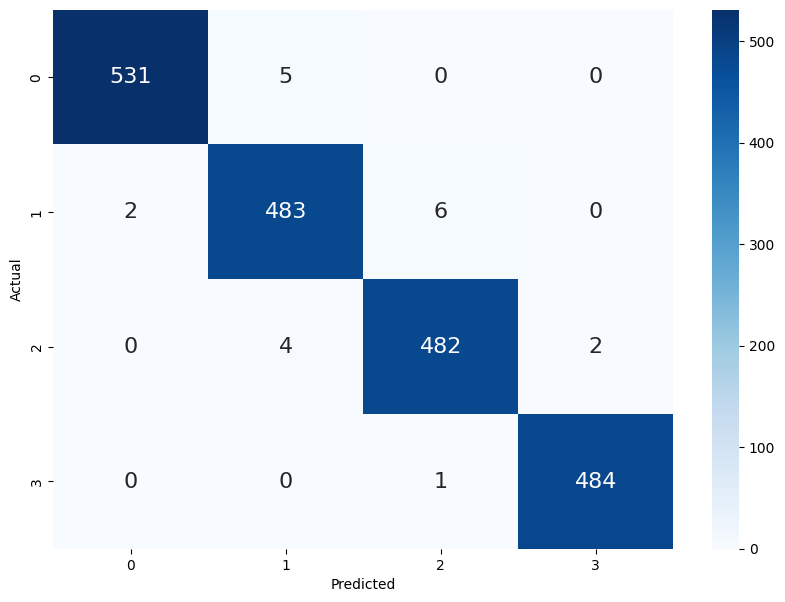

In [67]:
import seaborn  as sns
import matplotlib.pyplot as plt
%matplotlib  inline
plt.figure(figsize=(10,7))
sns.heatmap(cfm , cmap="Blues", annot=True, annot_kws={"size":16}, fmt="g")